In [173]:
library(readxl)
library(ggplot2)
library(writexl)
library(dplyr)
#install.packages("gridExtra")
library(gridExtra)
library(ggrepel)

In [174]:
df.class = read_excel("../../results/class.xlsx" ,sheet=1 )
df.scale = read_excel("../../results/class-scale.xlsx" ,sheet=1 )
df.wa = read_excel( "../../results/df-water-access.xlsx" ,sheet=1)
df.fa <- read_excel("../../results/df-seven-scores.xlsx",sheet=1)
df.fa <- df.fa %>% 
  rename(
      'Far.away.Dugwell' = ML1,
      'Package.Water'= ML2,
      'Piped.to.homes'= ML3,
      'Near.by.borehole'= ML4,
      'Piped.to.Yard.and.Tap' = ML5,
      'Spring' = ML6,
      'Near.by.Surface'= ML7
     )
df <- merge(x = df.class,
              y = df.fa,
              by = c("Country"))
df$clusters <- as.factor(df$clusters)

df <- df[,c(1,8,5,9, 12, 16:22 )] # 3 important explnatory variables from classification decision tree
head(df)


,Country,clusters,pcar,cgdp,popd,Far.away.Dugwell,Spring,Piped.to.homes,Piped.to.Yard.and.Tap,Package.Water,Near.by.Surface,Near.by.borehole
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Off-premise,11.8,18353881130,56.93776,0.572418217,0.27948505,0.4740642,0.48905269,0.3327190,0.6406390,0.5244550
2,Albania,Market,37.0,15147020535,104.61226,0.173347287,0.16631234,0.7812555,0.21604457,0.3179487,0.2668756,0.5813036
3,Angola,Off-premise,10.9,101353230785,24.71305,0.555402896,0.26567935,0.6221088,0.51799504,0.4010244,0.8739405,0.4280040
4,Armenia,Piping,39.2,12457941907,103.68022,0.006249719,0.01802207,0.9992766,0.05567089,0.0000000,0.1978413,0.5088645
5,Azerbaijan,Piping,20.4,47112941176,120.23432,0.172305543,0.17209406,0.6946237,0.41693952,0.2060016,0.4634648,0.4247652
6,Bangladesh,Market,0.8,274039092455,1239.57931,0.116506831,0.08746231,0.0000000,0.29168400,0.1829046,0.1907371,0.5876124


# Scatter Analysis PCAR

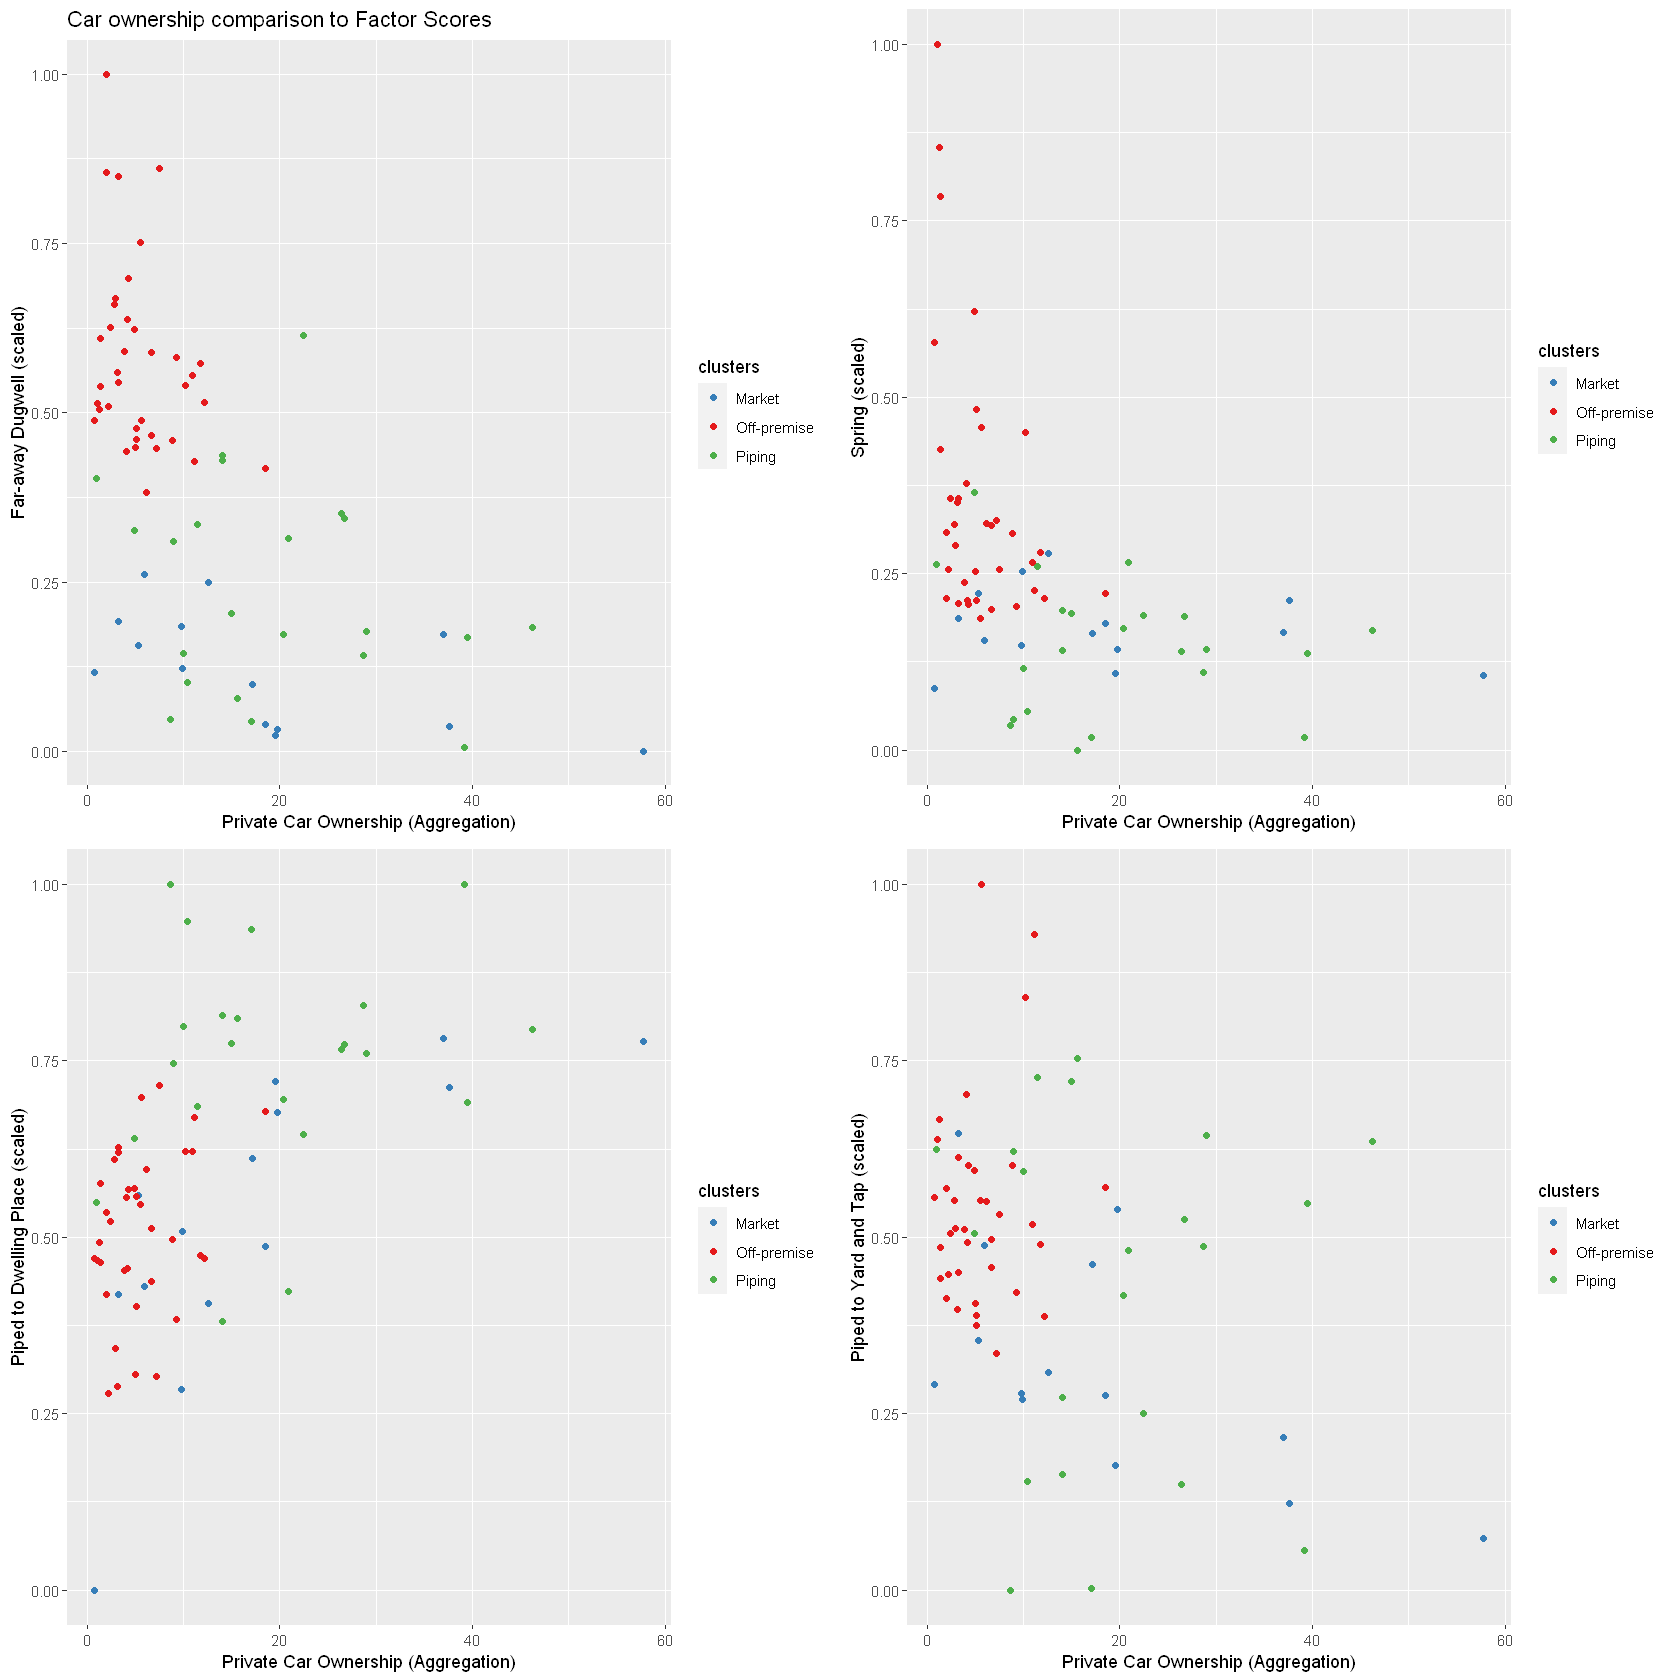

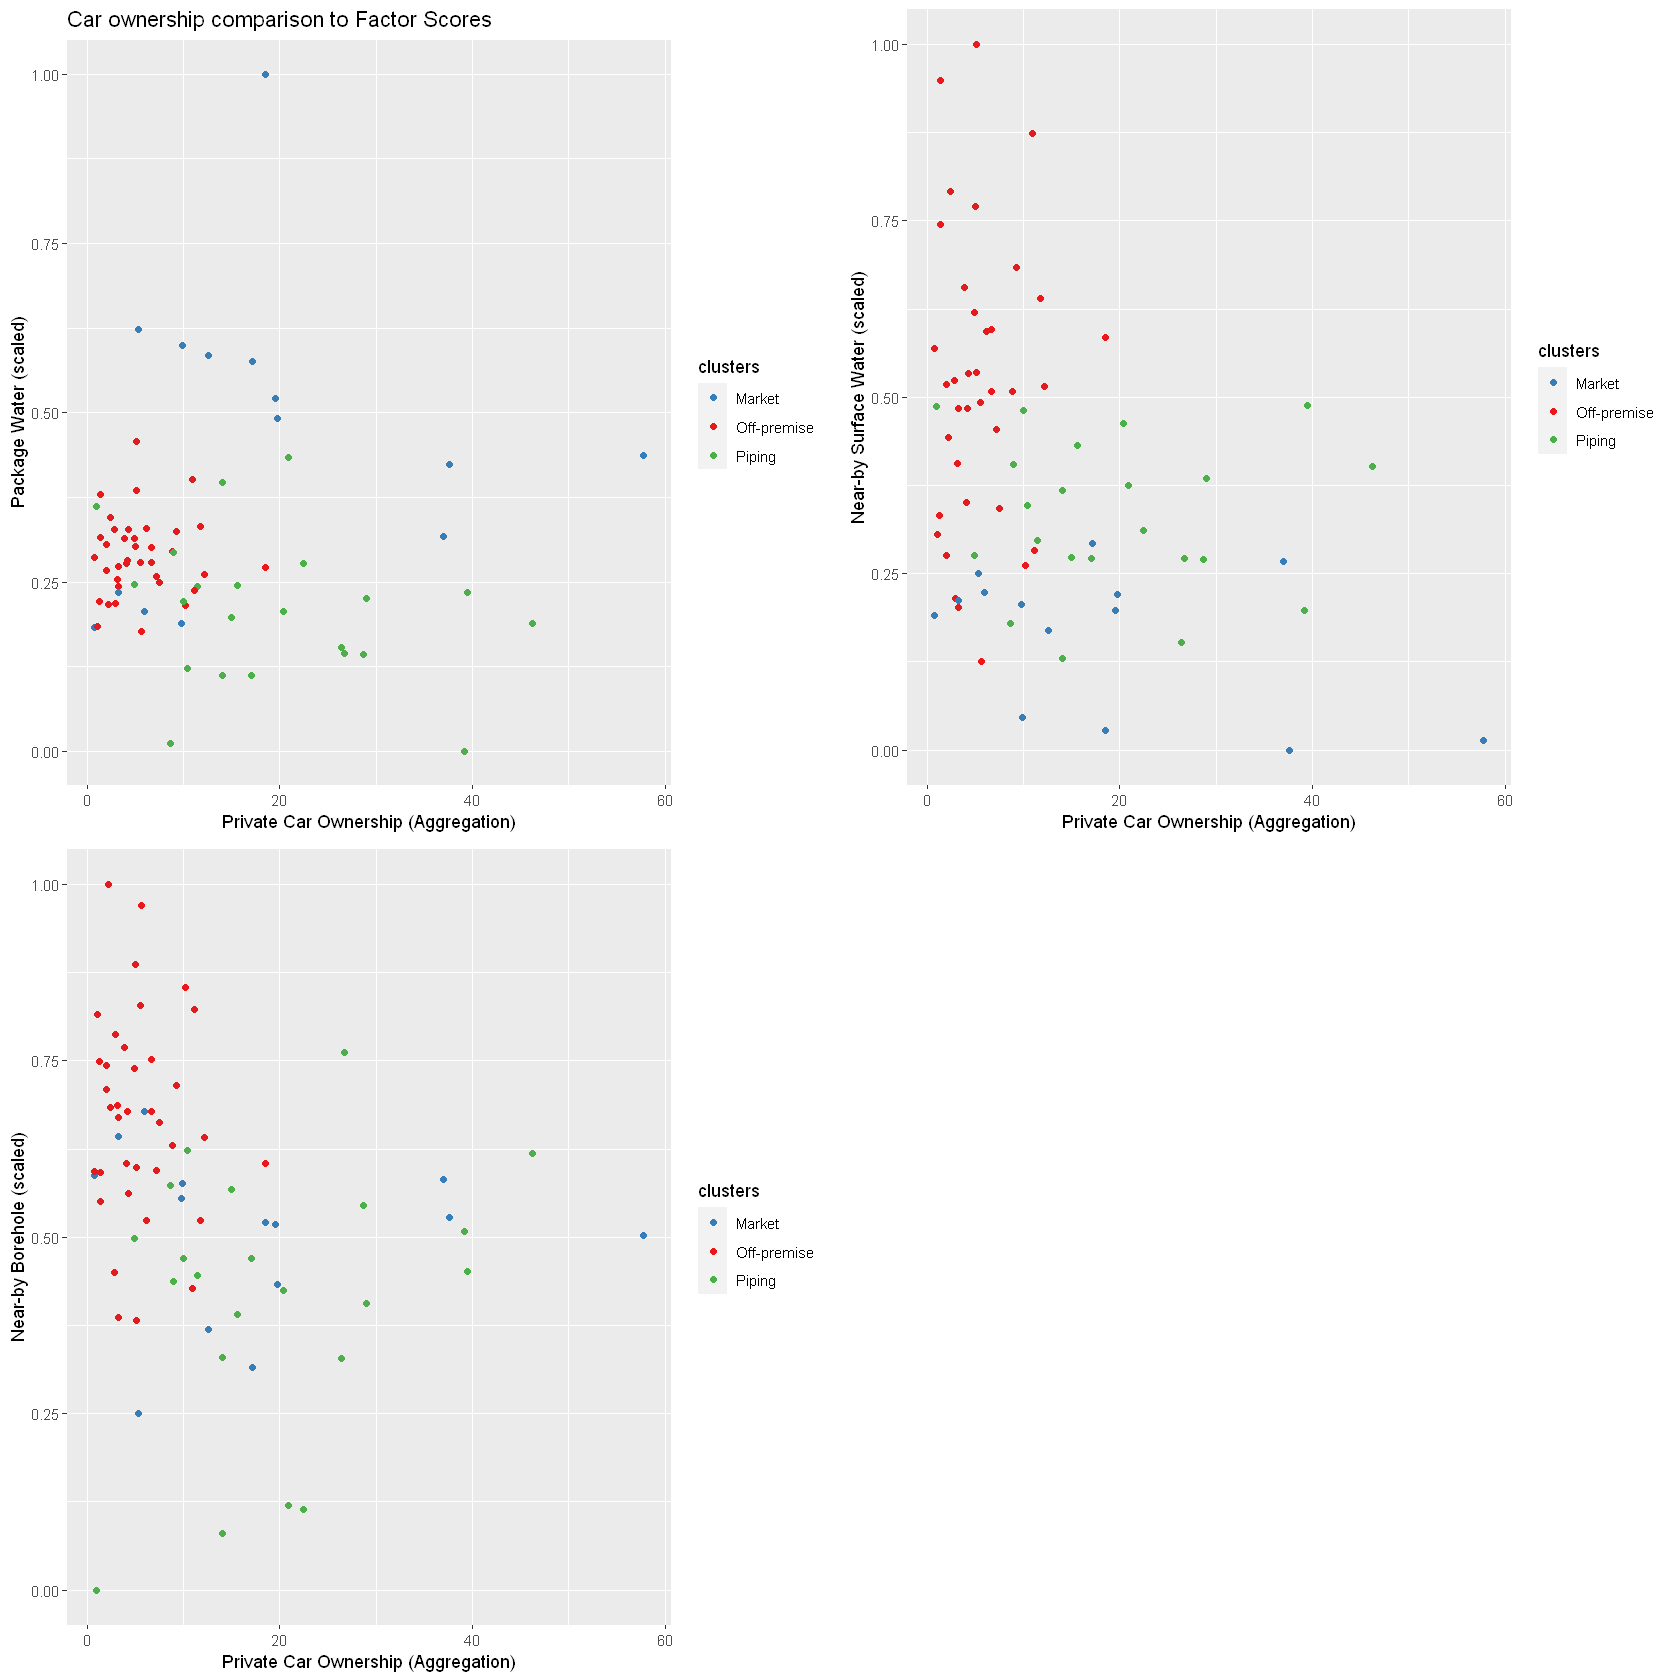

In [175]:
spd <- ggplot(df, aes(x=pcar, y= Far.away.Dugwell, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title="Car ownership comparison to Factor Scores",
       x="Private Car Ownership (Aggregation)", y = "Far-away Dugwell (scaled)")
#+ geom_text_repel(
#    label= df$Country, 
#    nudge_x = 0.07, nudge_y = 0.07, 
#    check_overlap = FALSE, size = 3,
#  angle = 45)
sps <- ggplot(df, aes(x=pcar, y= Spring, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Car Ownership (Aggregation)", y = "Spring (scaled)")  
spp <- ggplot(df, aes(x=pcar, y= Piped.to.homes, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Car Ownership (Aggregation)", y = "Piped to Dwelling Place (scaled)")  
spy <- ggplot(df, aes(x=pcar, y= Piped.to.Yard.and.Tap, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Car Ownership (Aggregation)", y = "Piped to Yard and Tap (scaled)")  
sppw <- ggplot(df, aes(x=pcar, y= Package.Water, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title="Car ownership comparison to Factor Scores",
       x="Private Car Ownership (Aggregation)", y = "Package Water (scaled)") 
spns <- ggplot(df, aes(x=pcar, y= Near.by.Surface, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Car Ownership (Aggregation)", y = "Near-by Surface Water (scaled)") 
spb <- ggplot(df, aes(x=pcar, y= Near.by.borehole, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Car Ownership (Aggregation)", y = "Near-by Borehole (scaled)") 

options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1,1,1,1))
par(cex=1.4)
grid.arrange(spd,sps,spp,spy , ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  
grid.arrange(sppw,spns,spb,  ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  


# Scatter Analysis CGDP

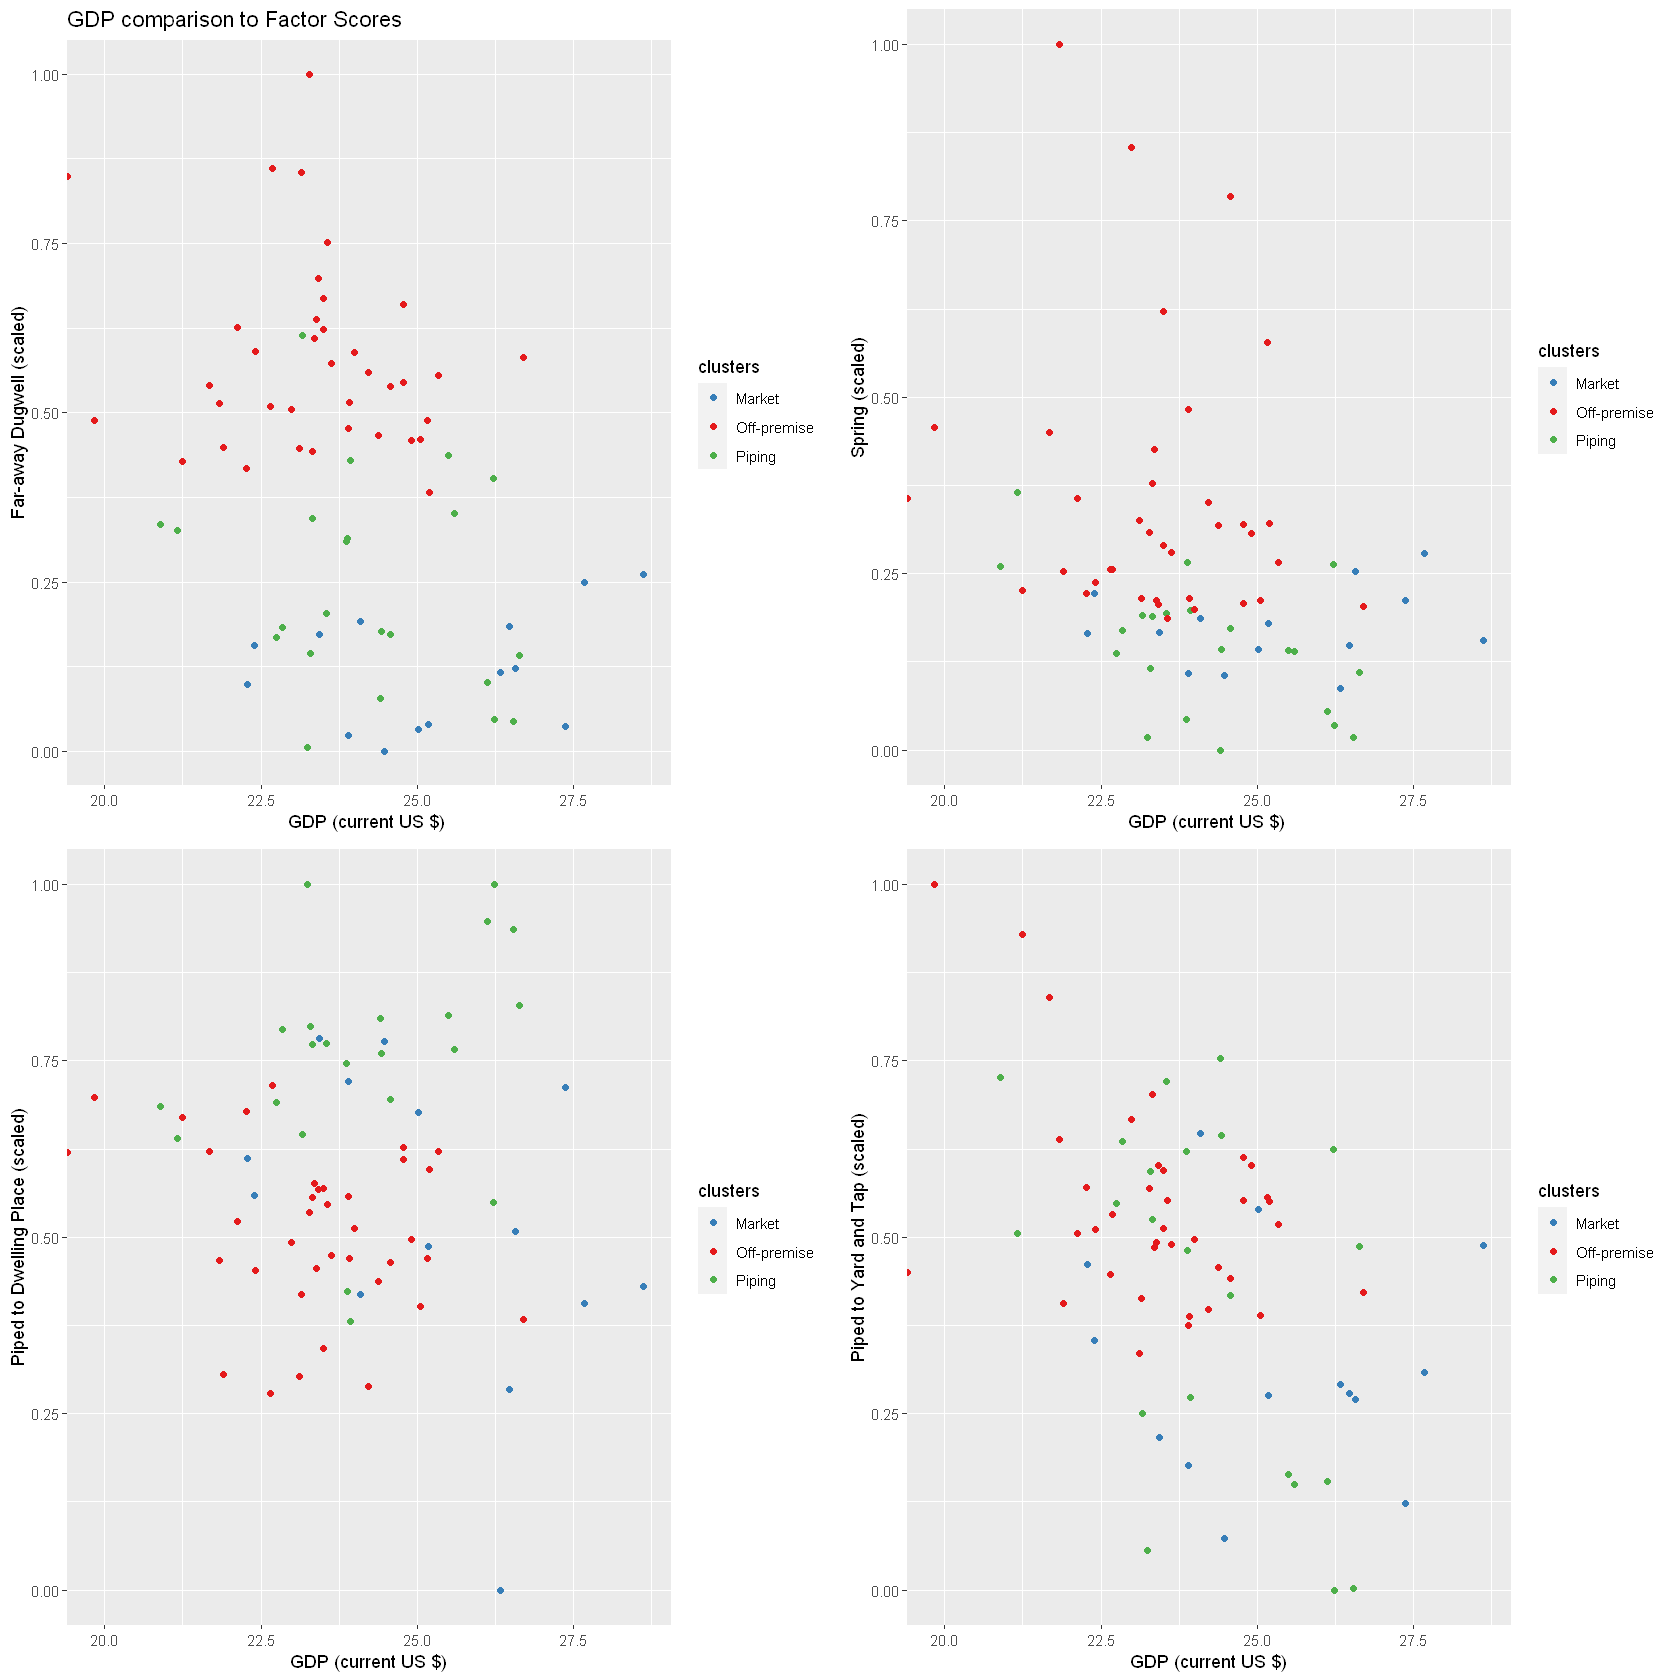

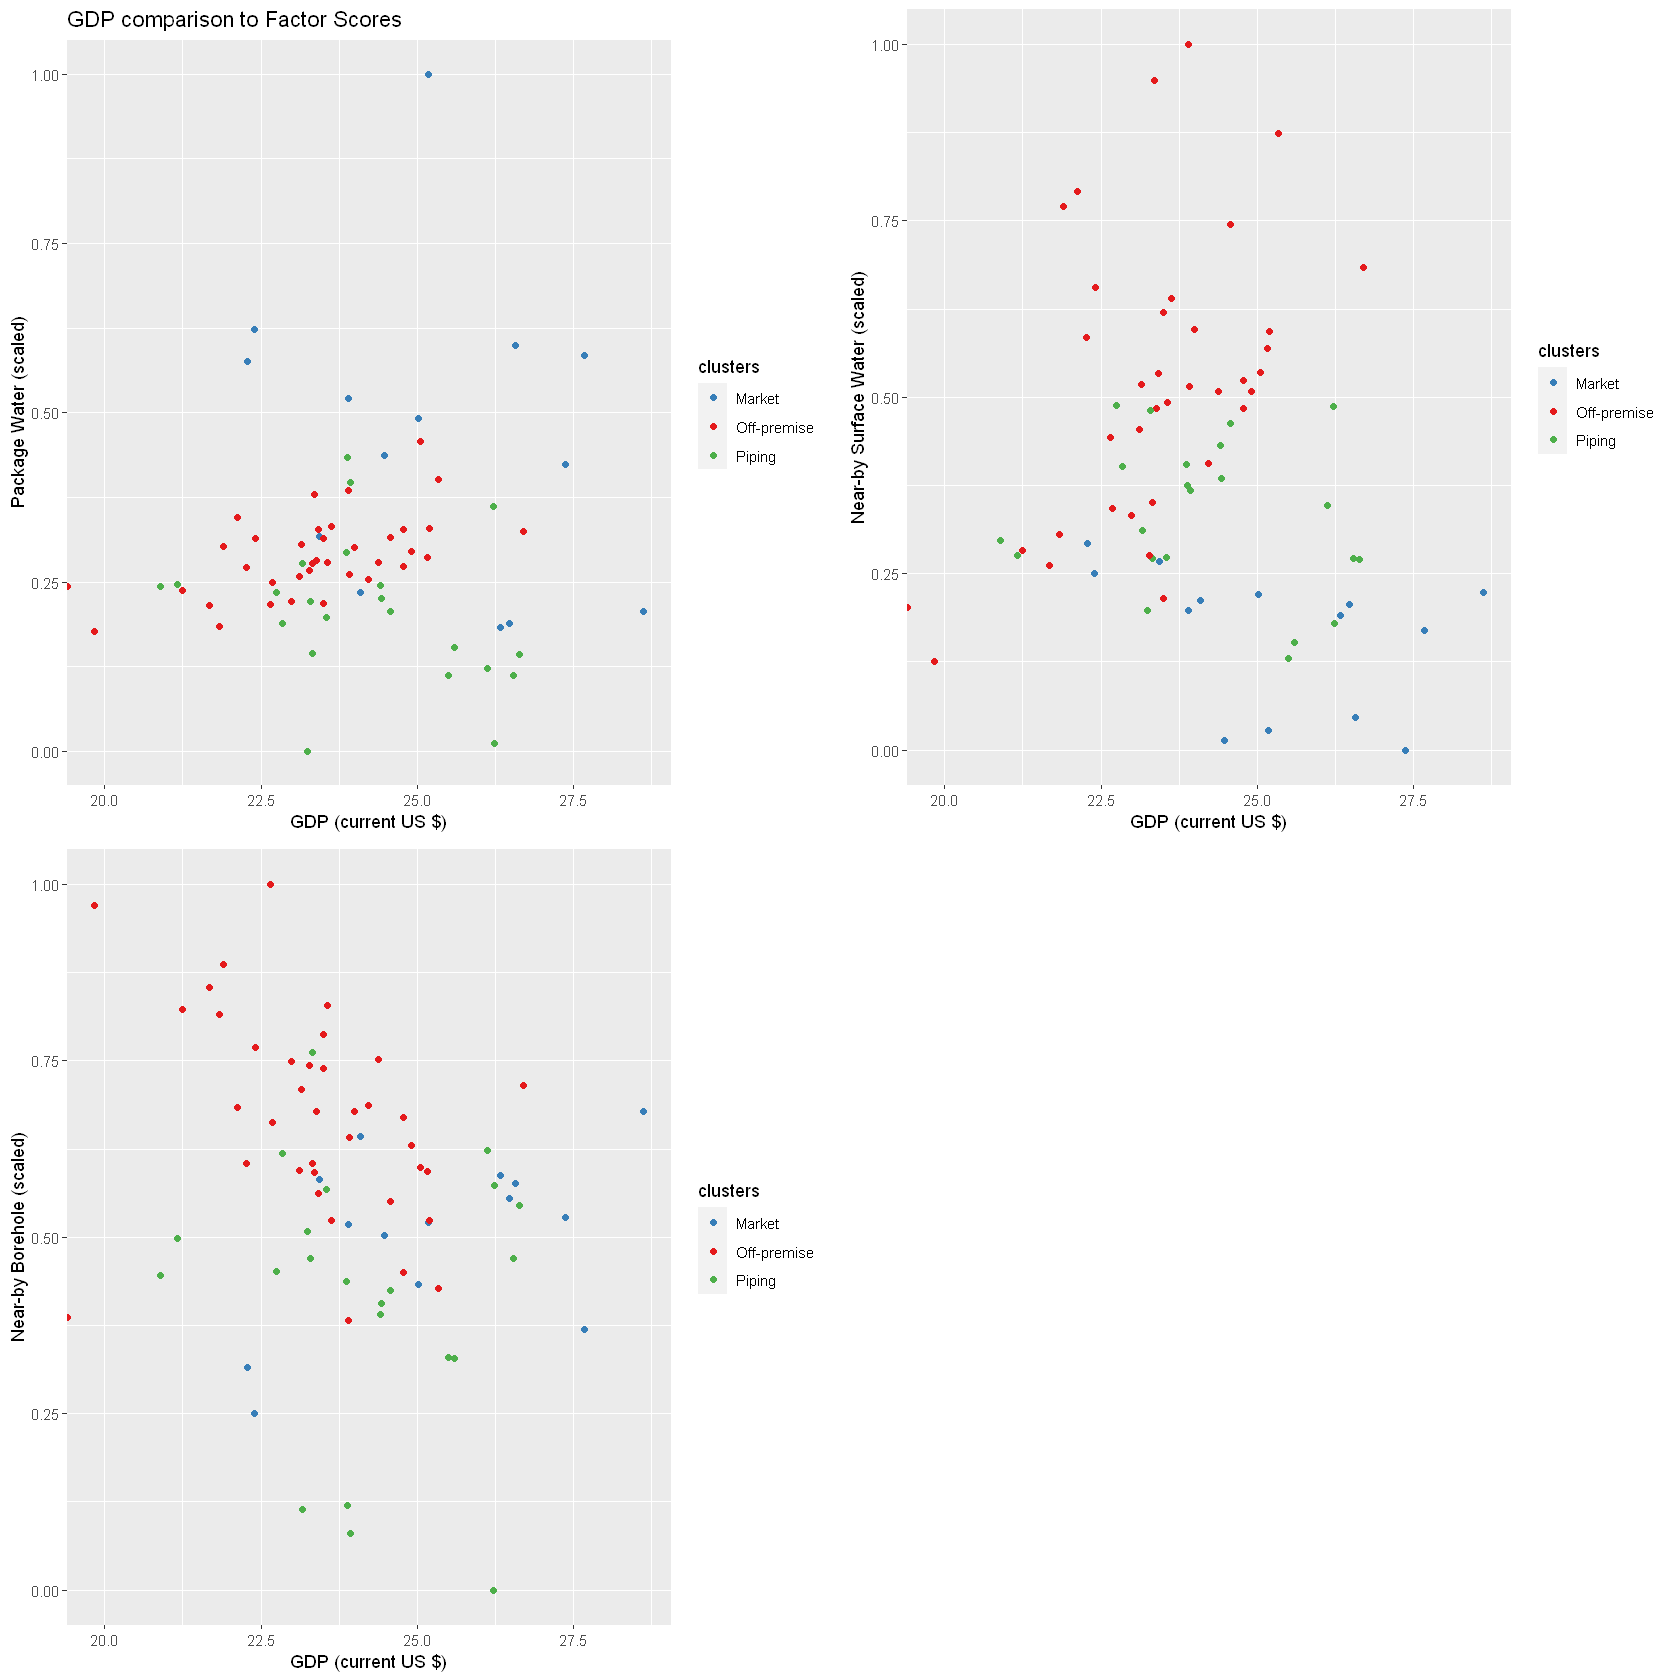

In [176]:
spd <- ggplot(df, aes(x=log(cgdp), y= Far.away.Dugwell, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title="GDP comparison to Factor Scores",
       x="GDP (current US $) ", y = "Far-away Dugwell (scaled)")
#+ geom_text_repel(
#    label= df$Country, 
#    nudge_x = 0.07, nudge_y = 0.07, 
#    check_overlap = FALSE, size = 3,
#  angle = 45)
sps <- ggplot(df, aes(x=log(cgdp), y= Spring, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="GDP (current US $) ", y = "Spring (scaled)")  
spp <- ggplot(df, aes(x=log(cgdp), y= Piped.to.homes, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Piped to Dwelling Place (scaled)")  
spy <- ggplot(df, aes(x=log(cgdp), y= Piped.to.Yard.and.Tap, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Piped to Yard and Tap (scaled)")  
sppw <- ggplot(df, aes(x=log(cgdp), y= Package.Water, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title="GDP comparison to Factor Scores",
       x="GDP (current US $)", y = "Package Water (scaled)") 
spns <- ggplot(df, aes(x=log(cgdp), y= Near.by.Surface, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Near-by Surface Water (scaled)") 
spb <- ggplot(df, aes(x=log(cgdp), y= Near.by.borehole, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Near-by Borehole (scaled)") 

options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1,1,1,1))
par(cex=1.4)
grid.arrange(spd,sps,spp,spy , ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  
grid.arrange(sppw,spns,spb,  ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  

# Scatter popd

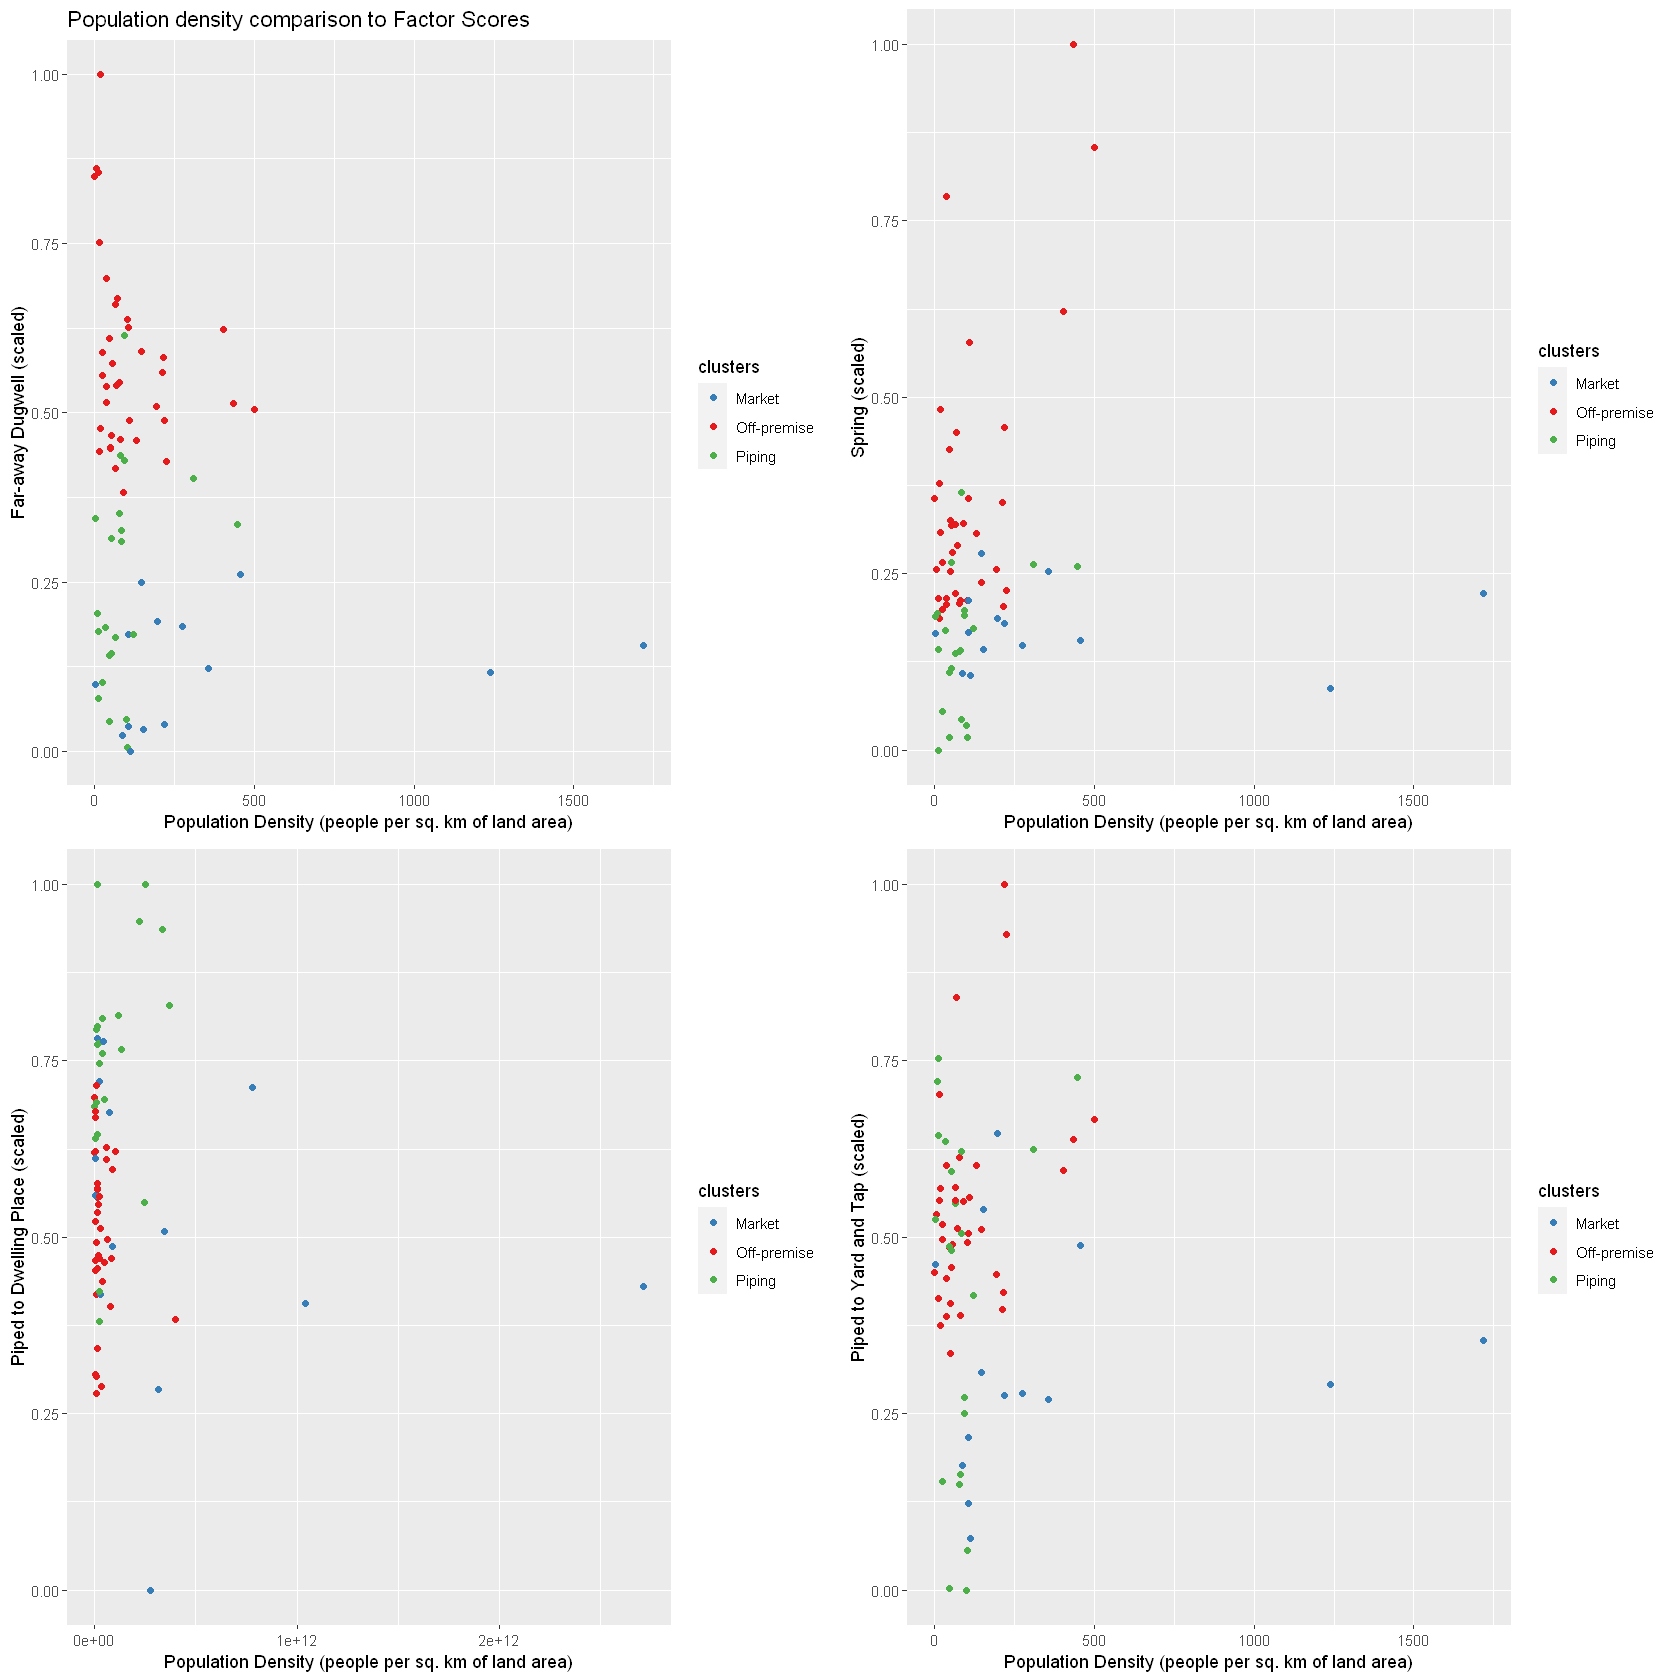

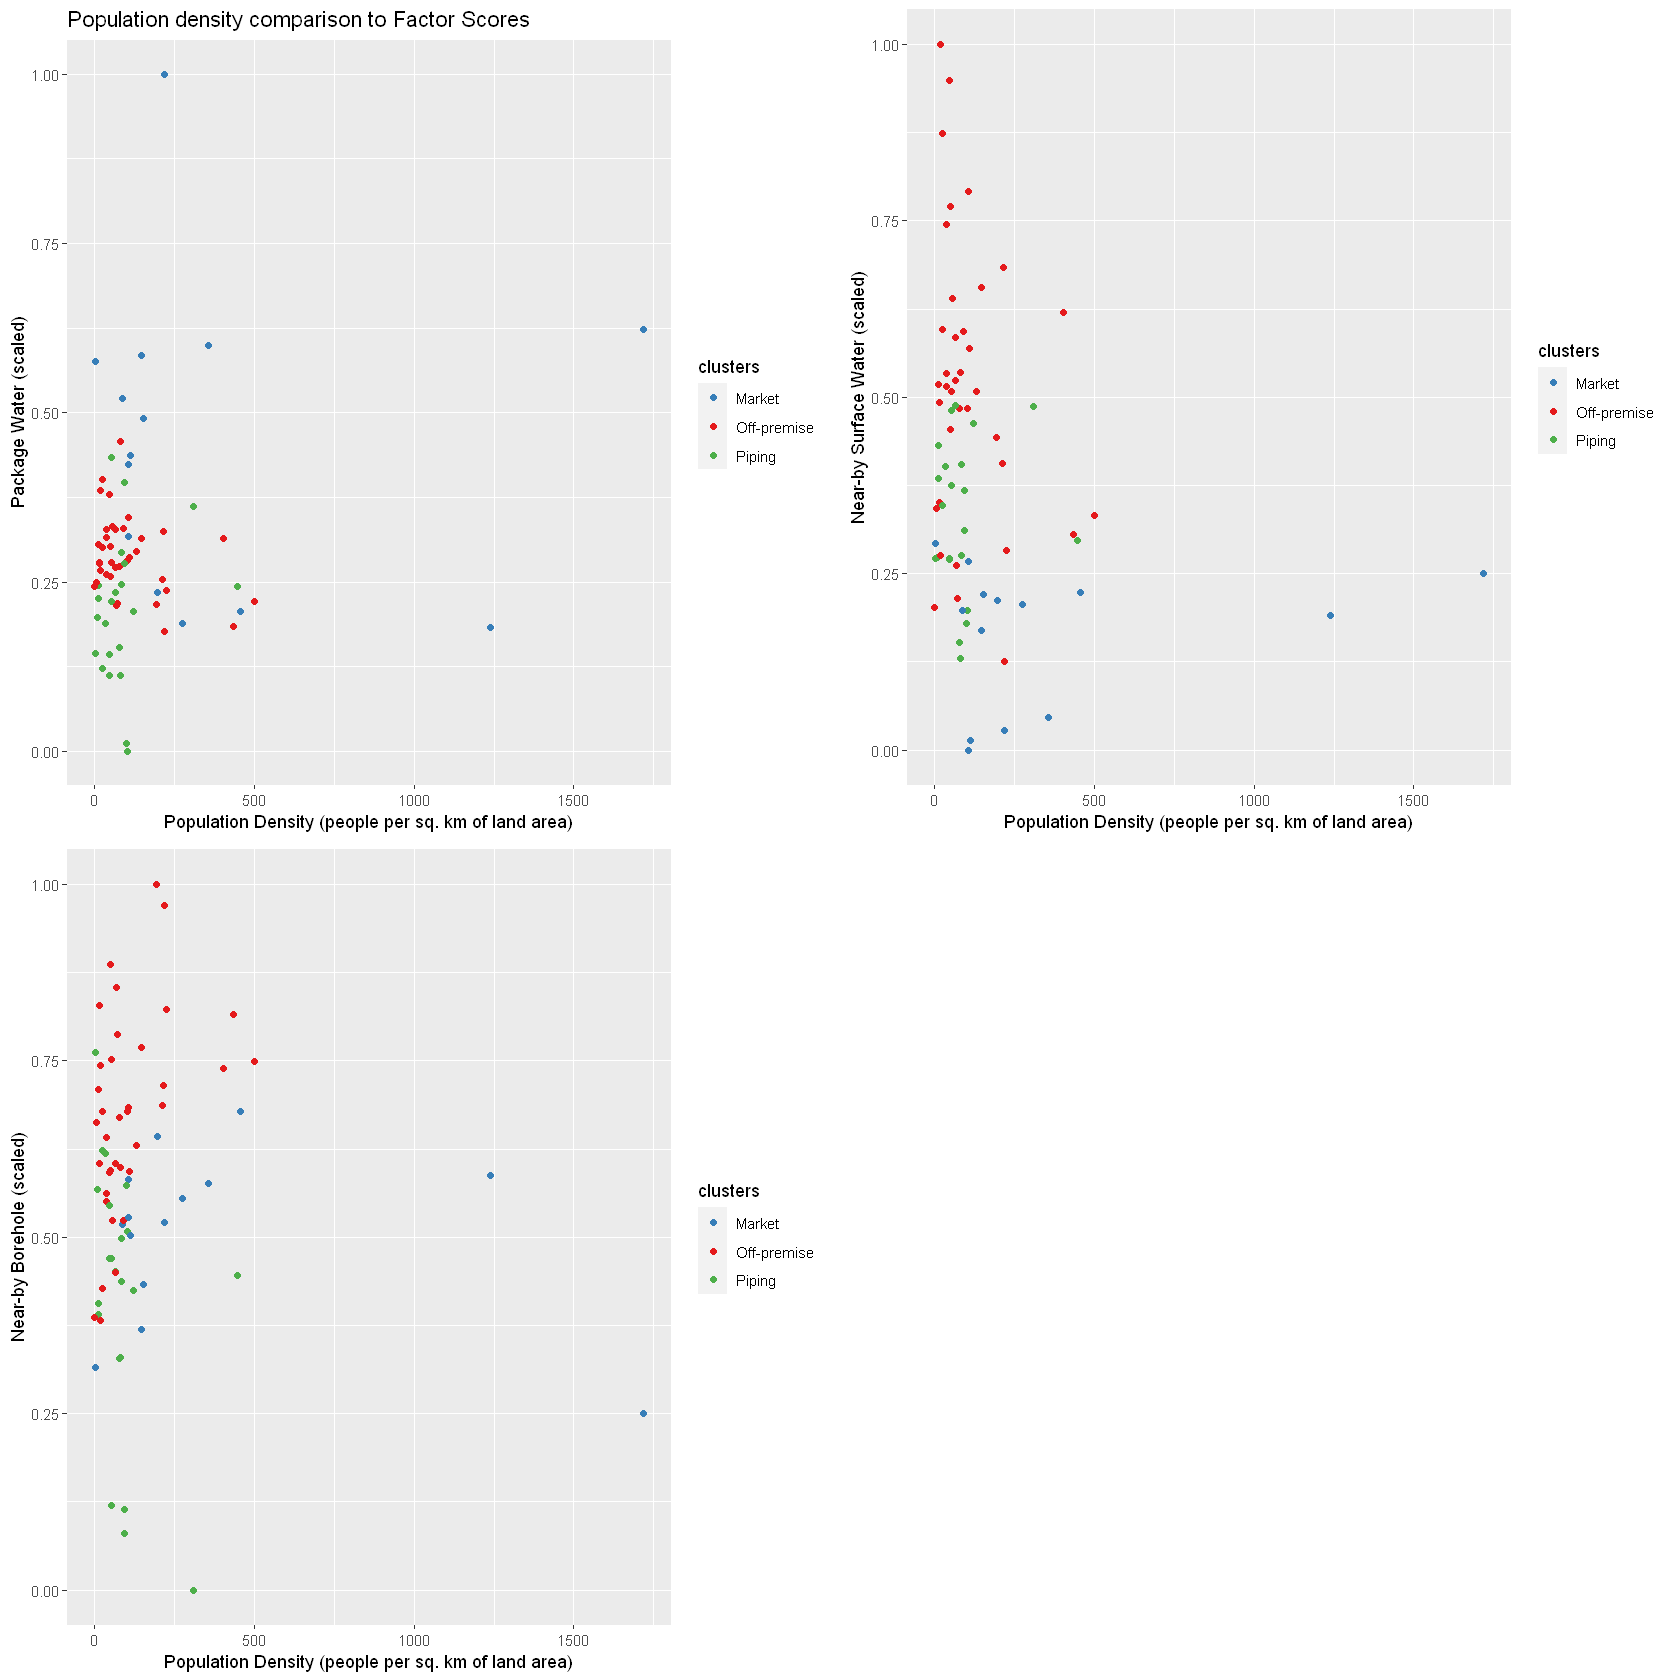

In [177]:
spd <- ggplot(df, aes(x=popd, y= Far.away.Dugwell, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title="Population density comparison to Factor Scores",
       x="Population Density (people per sq. km of land area)", y = "Far-away Dugwell (scaled)")
#+ geom_text_repel(
#    label= df$Country, 
#    nudge_x = 0.07, nudge_y = 0.07, 
#    check_overlap = FALSE, size = 3,
#  angle = 45)
sps <- ggplot(df, aes(x=popd, y= Spring, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Population Density (people per sq. km of land area)", y = "Spring (scaled)")  
spp <- ggplot(df, aes(x=cgdp, y= Piped.to.homes, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Population Density (people per sq. km of land area)", y = "Piped to Dwelling Place (scaled)")  
spy <- ggplot(df, aes(x=popd, y= Piped.to.Yard.and.Tap, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Population Density (people per sq. km of land area)", y = "Piped to Yard and Tap (scaled)")  
sppw <- ggplot(df, aes(x=popd, y= Package.Water, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title="Population density comparison to Factor Scores",
       x="Population Density (people per sq. km of land area)", y = "Package Water (scaled)") 
spns <- ggplot(df, aes(x=popd, y= Near.by.Surface, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Population Density (people per sq. km of land area)", y = "Near-by Surface Water (scaled)") 
spb <- ggplot(df, aes(x=popd, y= Near.by.borehole, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Population Density (people per sq. km of land area)", y = "Near-by Borehole (scaled)") 

options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1,1,1,1))
par(cex=1.4)
grid.arrange(spd,sps,spp,spy , ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  
grid.arrange(sppw,spns,spb,  ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  

# unimproved or improved comparison

,Country,clusters,pcar,cgdp,land,popd,imws,uiws
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Off-premise,11.8,18353881130,652860,56.93776,71.2,28.7
2,Albania,Market,37.0,15147020535,27400,104.61226,98.4,1.6
3,Angola,Off-premise,10.9,101353230785,1246700,24.71305,66.9,33.1
4,Armenia,Piping,39.2,12457941907,28470,103.68022,99.9,0.1
5,Azerbaijan,Piping,20.4,47112941176,82670,120.23432,90.6,9.4
6,Bangladesh,Market,0.8,274039092455,130170,1239.57931,97.8,2.2


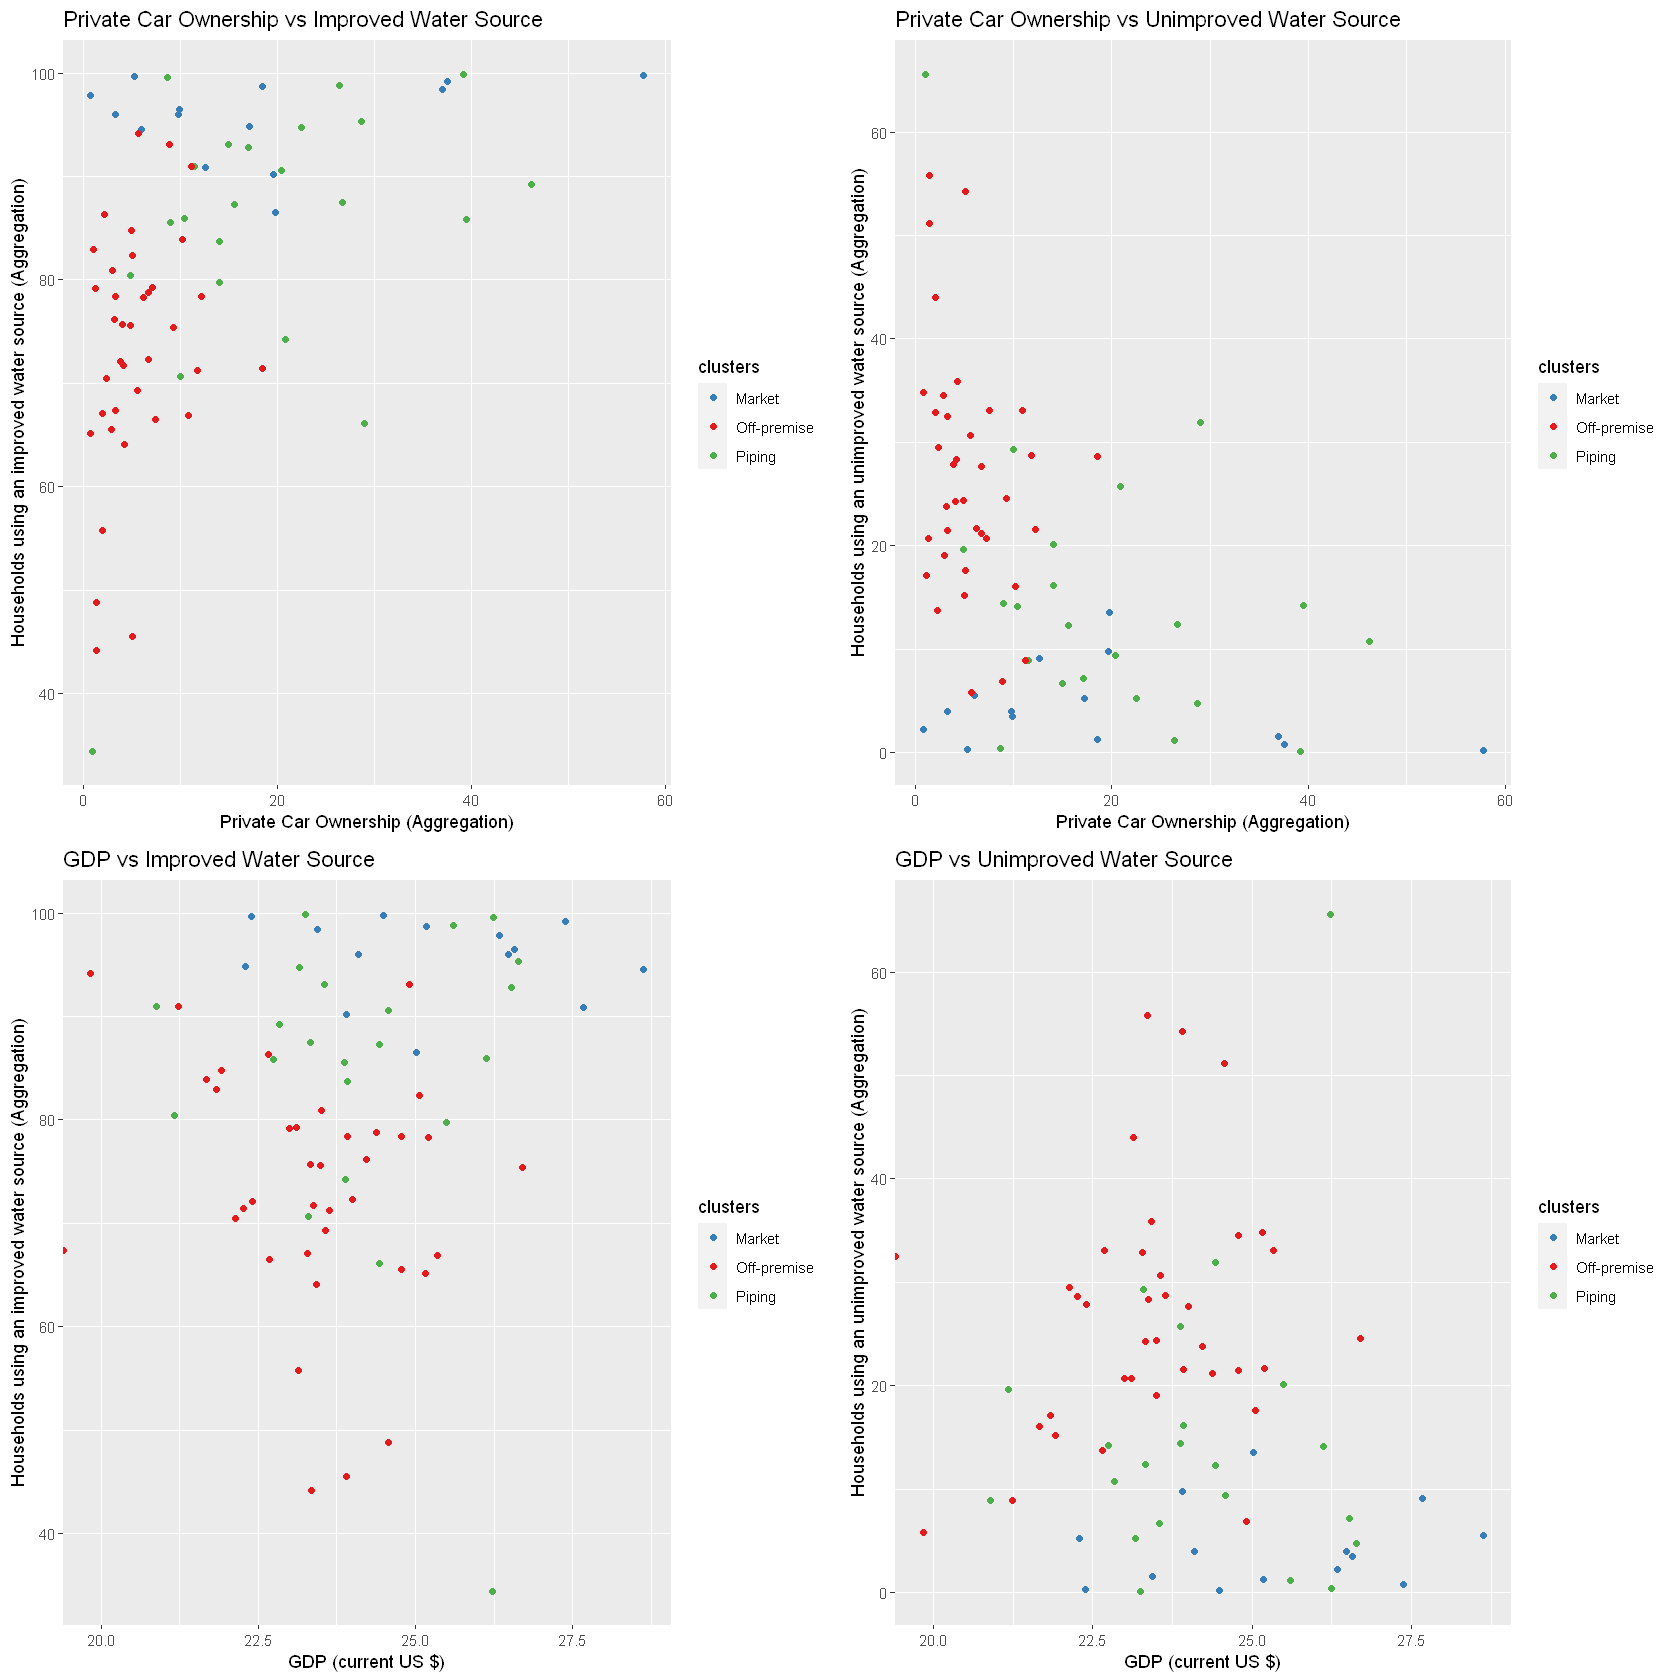

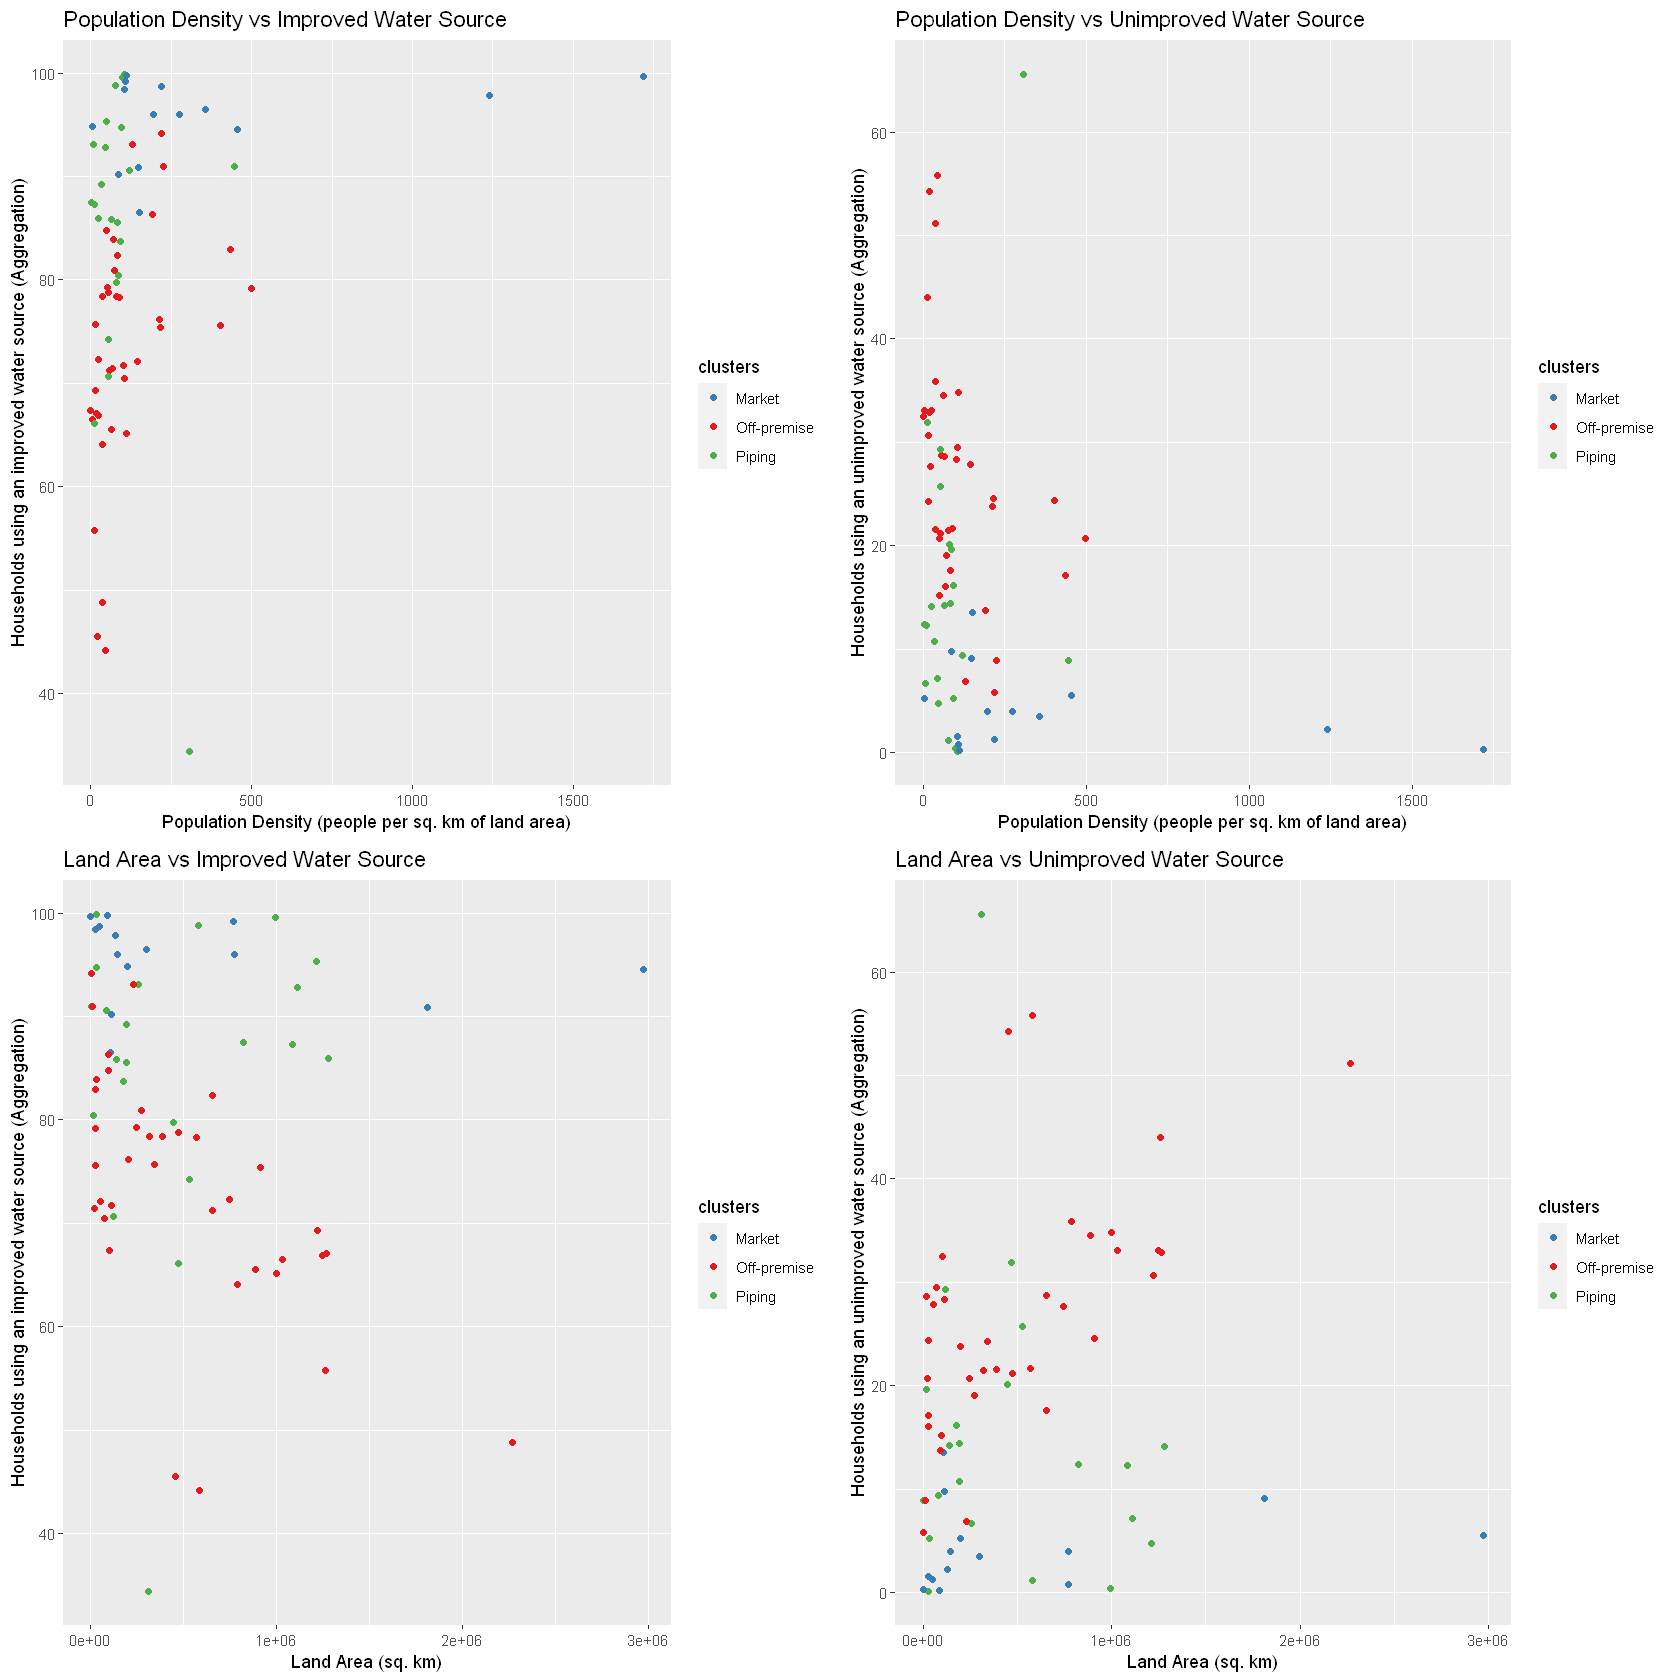

In [178]:
df.pro = read_excel("../../results/dfsimple.xlsx" ,sheet=1 )
df.pro <- df.pro[,c(1,4,15)]
df <- merge(x = df.class,
              y = df.pro,
              by = c("Country"))
df$clusters <- as.factor(df$clusters)
df <- df[,c(1,8,5,9,13,12,16:17)]
head(df)

sp.pcar.imws <- ggplot(df, aes(x=pcar, y= imws, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title="Private Car Ownership vs Improved Water Source",
       x="Private Car Ownership (Aggregation)", y = "Households using an improved water source (Aggregation)")

sp.pcar.uiws <- ggplot(df, aes(x=pcar, y= uiws, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title="Private Car Ownership vs Unimproved Water Source",
       x="Private Car Ownership (Aggregation)", y = "Households using an unimproved water source (Aggregation)")

sp.cgdp.imws <- ggplot(df, aes(x=log(cgdp), y= imws, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title="GDP vs Improved Water Source",
       x="GDP (current US $)", y = "Households using an improved water source (Aggregation)")

sp.cgdp.uiws <- ggplot(df, aes(x=log(cgdp), y= uiws, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title="GDP vs Unimproved Water Source",
       x="GDP (current US $)", y = "Households using an unimproved water source (Aggregation)")

options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1,1,1,1))
par(cex=1.4)
grid.arrange(sp.pcar.imws,sp.pcar.uiws ,sp.cgdp.imws,sp.cgdp.uiws, ncol=2, nrow=2, widths=c(5,5), heights=c(5,5))  

sp.popd.imws <- ggplot(df, aes(x=popd, y= imws, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title="Population Density vs Improved Water Source",
       x="Population Density (people per sq. km of land area)", y = "Households using an improved water source (Aggregation)")

sp.popd.uiws <- ggplot(df, aes(x=popd, y= uiws, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title="Population Density vs Unimproved Water Source",
       x="Population Density (people per sq. km of land area)", y = "Households using an unimproved water source (Aggregation)")

sp.land.imws <- ggplot(df, aes(x=land, y= imws, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title="Land Area vs Improved Water Source",
       x="Land Area (sq. km)", y = "Households using an improved water source (Aggregation)")

sp.land.uiws <- ggplot(df, aes(x=land, y= uiws, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title="Land Area vs Unimproved Water Source",
       x="Land Area (sq. km)", y = "Households using an unimproved water source (Aggregation)")
grid.arrange(sp.popd.imws, sp.popd.uiws,sp.land.imws,sp.land.uiws,   ncol=2, nrow=2, widths=c(5,5), heights=c(5,5)) 